<a/ id='top'></a>
# Homework 4: More Simulation and the Central Limit Theorem 
***

**Name**:

***

This assignment is due on Moodle by **5 PM on Sunday 1 July**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
### [35 points] Problem 1 - Monte Carlo Estimation of Definite Integrals

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used frequently in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a relatively simple integral. 

<br>

**Part A.**  Let $X$ be a random variable representing how delicious a pie you bake is, as measured by the **Deliciousness Index** (DI).  Suppose the probability density function for $X$ is described by the raised cosine probability density function that we examined in Homework 3:

$$
f(x) = \begin{cases}
         \dfrac{1}{\pi}\left(\cos{(x)} + 1\right) & 0 \leq x \leq \pi \\
         0                           & \text{otherwise}
         \end{cases}
$$

A Deliciousness Index of $\pi$ is the most delicious pie you can ever hope to create, and a DI of $0$ is the most disgusting pie you have ever tasted.  

Compute **by hand**, the integral of $f(x)$ for $0 \leq x \leq \dfrac{\pi}{2}$.  Write a sentence or two to interpret your result physically, in the context of this problem set-up.

$$
\begin{align*}
    \int_{0}^{\frac{\pi}{2}} \frac{1}{\pi} ( \cos (x) + 1 ) \, dx &= \frac{1}{\pi} \int_{0}^{\frac{\pi}{2}} ( \cos (x) + 1 ) \, dx \\
    &= \frac{1}{\pi} \left[ \int_{0}^{\frac{\pi}{2}} \cos (x) \, dx + \int_{0}^{\frac{\pi}{2}} \, dx \right] \\
    &= \frac{1}{\pi} \left[ 1 + \frac{\pi}{2} \, \right] \\
    &= \frac{1}{\pi} + \frac{1}{2} \\
    &\approx 0.8183
\end{align*}
$$

This result is the area under the distribution between $x=0$ and $x=\frac{\pi}{2}$. In other words, it is the value of the CDF of this distribution at $x=\frac{\pi}{2}$ and the probability that a given pie has a DI of less than or equal to $x=\frac{\pi}{2}$.

<br>

**Part B.** Suppose we sample a random variable $X$ from $U(0,\frac{\pi}{2})$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,\frac{\pi}{2}] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

The ratio of points under the curve to the total points sampled is an estimate of the proportion, $\hat{p}$, of points that fall under $f(x)$ instead of above. By the central limit theorem, the value of $\hat{p}$ will become normally distributed as more points are sampled.

<br>

**Part C.** How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral?  If you need inspiration, check out the in-class notebook on Stochastic Simulation (#4), specifically, the exercise where we estimated $\pi$.

In Part B it is discussed how the ratio of points under the curve to the total number of sample points is a sample proportion $\hat{p}$. This means that it is estimated that $\hat{p}$ times the total area sampled will be the area underneath the curve, as $\hat{p}$ represents a fraction of points that will fall under the curve. So, to calculate the approximate value of the integral, determine an estimate for the proportion of points that will fall below the curve, then multiply that by the area of the domain.

<br>

**Part D.** Write a function `integrate` to compute an approximation to the definition integral $\int_0^{\text{ub}} f(x)dx$.  Your function should take as arguments:
1. `num_samples` -- the number of points to sample,
2. `ub` -- a number between $0$ and $\pi$ that is the upper bound of the integral, and
3. `isPlot` -- a Boolean flag for whether or not to display a plot of the results.

Your function should return an approximation of the definite integral by sampling $X$ from $U(0,\text{ub})$ and $Y$ from $U(0,1)$. For each random draw $(X,Y)$, define the random variable $Z$ that represents whether or not the sampled $Y$ value is less than $f(X)$ for the corresponding $X$ value.

Your function should perform three tasks: 

1. return the estimate of the value of the integral,
2. return the sample variance of the random variable $Z$ being simulated, using the np.var function, and
3. if `isPlot` is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

Run your simulation with `isPlot=True` and `ub=`$\frac{\pi}{2}$ for 1,000 samples so we can see your plot. Then, run your simulation (with `isPlot=False`) with at least 10,000 samples and estimate the value of the given integral.  Does your estimate agree with the exact value of the integral you computed in **Part A**? 

Value of integral: 0.8216
Variance in Z: 0.2495


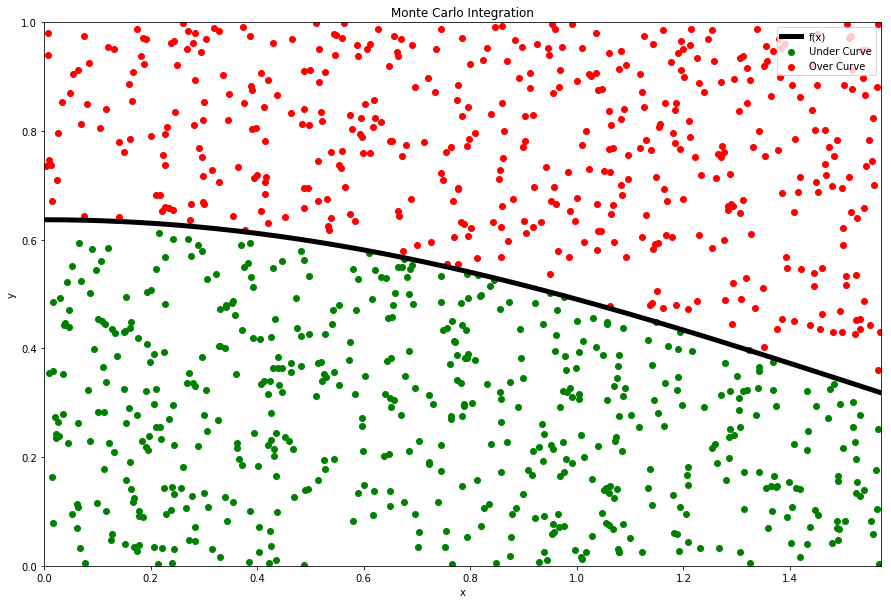

In [2]:
# A helper function for free!
def raised_cosine(x):
    return (np.cos(x)+1)/np.pi


def integrate(num_samples=1000, ub=3.1416, isPlot=False):
    # z is a discrete random variable describing whether a point falls above or
    # below the function f(x). It takes on a value of 0 or 1. Below stores the
    # value of z for each trial.
    z = np.zeros(num_samples)
    
    # Store the sample points above and below the function to later be colored.
    pts_under = np.empty((0,2))
    pts_over = np.empty((0,2))
    
    # Sample the domain and determine values of z for each point. Save each
    # point to the appropriate array.
    for n in range(0, num_samples):
        x = np.random.uniform(low=0, high=ub)
        y = np.random.uniform(low=0, high=1)
        z[n] = y <= raised_cosine(x)
        if z[n]:
            pts_under = np.append(pts_under, [[x,y]], axis=0)
        else:
            pts_over = np.append(pts_over, [[x,y]], axis=0)
    
    # Plot the results of the sampling.
    if isPlot:
        fx = np.linspace(0,ub,1000)
        fy = raised_cosine(fx)
        plt.figure(figsize=(15,10))
        plt.title("Monte Carlo Integration")
        plt.xlabel("x")
        plt.ylabel("y")
        
        plt.scatter(pts_under[:,0], pts_under[:,1],c='g')
        plt.scatter(pts_over[:,0], pts_over[:,1],c='r')
        plt.plot(fx,fy,linewidth=5,c='k')
        
        plt.legend(("f(x)", "Under Curve", "Over Curve"), loc='upper right')
        
        plt.xlim((0,ub))
        plt.ylim((0,1))
    
    # Probability that a point is below the function.
    p = np.count_nonzero(z)/n
    
    # Return the area under the curve by multiplying the area of the domain we are
    # sampling from times the probability. Also compute and return the variance in
    # the discrete random variable z.
    return ub*p, np.var(z, ddof=1)


# Integrate and plot
integrate(num_samples=1000, ub=np.pi/2, isPlot=True);

# Integrate with more samples. Do not plot. Print integral value and variance.
n = 10000
x, s = integrate(num_samples=n, ub=np.pi/2, isPlot=False);
print("Value of integral: {:0.4f}".format(x))
print("Variance in Z: {:0.4f}".format(s))

In [3]:
stderr = math.sqrt(s/n)
print("Standard error: {:0.3e}".format(stderr))
print("Estimate aggrees within 3 standard errors: " + str(np.abs(0.8183-x) <= 3*stderr))

Standard error: 4.995e-03
Estimate aggrees within 3 standard errors: True


My estimate for the value of the integral agrees pretty closely with the value I obtained in Part A (0.8183). The difference between the estimated value and the value I obtained analyitcally is less than 3 standard errors apart. This is a definition of "agree" I learned in experimental phyiscs.

<br>

**Part E.** In the simulation above, what is distribution of the random variable $Z$ that we're actually sampling? What is/are the parameters of this distribution?  

$Z$ is being sampled from a Bernoulli distribution because each independent sample has a boolean outcome. So, $Z \in \{ 0, 1 \}$. Because $Z$ itself does not measure successes out of a certain number of trials, it is not binomially distributed. However, if the `integrate` function were to be called multiple times and the number of $Z$'s which were true counted, that value would be binomially distributed. 

The only parameter required of the Bernoulli distribution that $Z$ follows is $p$, the probability of success --- success meaning that the sample point is below $f(x)$. Analytically, $p$ is the area under the curve divided by the total area equal to $\frac{2+\pi}{\pi^2}$. This is approximately $0.5210$. 

<br>

**Part F.**  Compute the expected value of the random variable you described in **Part E** by hand.  Does this value agree with the exact value of the integral you computed in **Part A** and the estimated value you simulated in **Part D**? 

$$
\begin{align*}
E[Z] &= \sum_{i=1}^{n} a_i P( a_i ) \\
     &= 1 \times \frac{2+\pi}{\pi^2} + 0 \times (1 - \frac{2+\pi}{\pi^2}) \\
     &= \frac{2+\pi}{\pi^2} \\
     &= \left( \frac{1}{\pi} + \frac{1}{2} \right) \div \frac{\pi}{2}
\end{align*}
$$

The expected value of $Z$ is $\frac{2+\pi}{\pi^2}$ as would be predicted for a Bernoulli distributed variable. It agrees with the exact value of the integral from Part A and the estimated value from Part D because multiplying the expected value by the area of the domain, $\frac{\pi}{2}$, yields the analytical value of the integral (Part A) and is very close to the numerical value (Part D).


<br>

**Part G.** Compute the variance of the random variable you described in **Part E** by hand.  Does this value agree with the sample variance observed in your simulation for **Part D**? 

$$
\begin{align*}
Var[Z] &= E[Z^2] - E[Z]^2 \\
     &= \sum_{i=1}^{n} a_i^2 P( a_i ) - \left( \frac{2+\pi}{\pi^2} \right) ^2 \\
     &= \frac{2+\pi}{\pi^2} - \left( \frac{2+\pi}{\pi^2} \right) ^2 \\ 
     &= \frac{2+\pi}{\pi^2} \left( 1 - \frac{2+\pi}{\pi^2} \right) \\
     &\approx 0.2496
\end{align*}
$$

This value, $\frac{2+\pi}{\pi^2} \left( 1 - \frac{2+\pi}{\pi^2} \right)$ agrees very closely with the value I obtained in Part D. This is a strong indicator that $Z$ is Bernoulli distributed.

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
### [30 points] Problem 2 - Mmmm... Donuts...

<img src="http://astrokentico.s3.amazonaws.com/rojakdaily/media/1nichoras/homer%20simpson%20krispy%20kreme/main.jpg?ext=.jpg" style="width:300px;"/>

You bring many donuts (or _doughnuts_, if you will) to work to share with your coworkers at the Boulder Nuclear Power Planet. But due to the high levels of radiation there, they must be inspected for safety. In particular, if the mean level of radiation in a sample from your batch of donuts is above [200 mSv (millisievert)](#rad), then they are deemed unsafe and you must throw the whole batch away.

You know that historically donuts at the power plant have, on average, 190 mSv of radiation, with a standard deviation of 40 mSv. To test the donut radiation levels, you take the donut receipt and pick every fifth donut off it, and sample the radiation levels of those donuts. You end up sampling the radiation levels of 36 donuts out of the batch.

<br>

**Part A.** What type of sample did you collect?  What is the sample frame? What is the ***minimum*** number of donuts you could have bought, in total?

A systematic sample was collected because data were sampled at a regular interval. The sample frame was the reciept from which donuts were picked. The minimum number of donuts that could have been bought is $36 \times 5 - 4 = 176$. The rationale behind this is if the first donut was sampled, $k=0$ and every fifth donut was sampled, $k=5n, \quad 0 \leq n < 36$, then the last sampled donut corresponds to $n=35$ and $k=175$, the 176$^\mathrm{th}$ donut. No other donuts follow.  However, if the fifth donut, $k=4$, was the first sample, then the minimum number would just be $36 \times 5 = 180$ donuts.

<br>

**Part B.** What is the probability that a donut batch is deemed unsafe?  You should at the very least set up and justify your calculation by hand (in Markdown/Mathjax), before executing any calculations in Python.

We seek the value of the CDF above $r=200\,\text{mSv}$ where $r$ is the dose of radiation. By the central limit theorem, the sample mean of the radiation dose of the donuts will be normally distributed about $\mu=190\,\text{mSv}$. The variance of this distribution will be $\frac{40^2}{36} \approx 44.4\,\text{mSv}^2$. That is, $P_X (r) \sim N(190\,\text{mSv},\,44.4\,\text{mSv}^2)$ where $X$ is the continuous random variable corresponding to the radiation dose. The CDF can be evaluated in the following way. 

First, convert the 200 mSv value to a standard value using the known mean and standard deviation.
$$
Z=\left( \frac{X - \mu}{\sigma} \right) = \left( \frac{200\,\text{mSv} - 190\,\text{mSv}}{6.67\,\text{mSv}} \right) = 1.5
$$

Next, evaluate the area under the standard normal from $-\infty$ to 1.5 and subtract that from 1 to get the total probability that the donuts will be safe.

$$
1-\int_{-\infty}^{1.5} \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}x^2} \, dx
$$

This can be numerically evaluated, see below.

In [4]:
x = 200
mu = 190
n = 36
sigma2 = 40**2 / n
sigma = math.sqrt(sigma2)
z = (x-mu)/sigma
value = 1-stats.norm.cdf(z)
print("{:0.4f}".format(value))

0.0668


So, the probability that the donuts will be deemed unsafe is 6.7%.

<br>

**Part C.** You really do not want to throw away donuts that frequently, so you propose to store the donuts in a lead-lined donut box. But lead also is not very good for your health, so you are motivated to use the least amount of lead possible. What is the minimum mean amount of radiation $\mu$ for our donuts to have such that the probability that we will throw donuts out due to safety concerns is at most 0.001?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

We seek the value of mu for which the CDF of the standard normal at $r=200\,\text{mSv}$ subtracted from 1 evaluates to 0.001. To do this, we first find the critical value $Z_{\alpha}$ where $\alpha=0.999$. This can be done with the SciPy function `ppf`.

In [5]:
za = stats.norm.ppf(0.999)
print("{:0.4f}".format(za))

3.0902


So, $Z_{\alpha}$ is about 3.0902. This is equal to $\frac{X-\mu}{\sigma}$. $X$ and $\sigma$ are known, so $\mu$ can now be evaluated, see below.

In [6]:
mu = -1 * (za * sigma - x)
print("{:0.4f}".format(mu))

179.3985


As we can see, the mean radiation dose that the donuts should experience for a 0.1% chance that they will need to be thrown out is 179.3985 mSv. This result will change for a different number of samples.

<br>

**Part D.**  Your supervisor at the plant decides that serving up donuts in a lead-lined box is a bad idea. Fair enough.

But he is still imposing the requirement that the probability of a batch of donuts being rejected must be less than 0.001. Suppose the mean and standard deviation are at their original values of $\mu = 190$ mSv and $\sigma = 40$ mSv. What is the minimum sample size to satisfy this requirement?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

In this case, we are varying the sample size $n$ so as to change the value of the standard deviation of the sample distribution. The equation for $Z_\alpha$ can be expanded as to include $n$.

$$
\begin{align*}
    Z_{\alpha} &= \frac{X_{\alpha} - \mu}{ \sqrt{ \frac{\sigma^2}{n} } } \\
               &= (X_{\alpha} - \mu) \times \sqrt{\frac{n}{\sigma^2}} \\
    \implies n &= \left( \frac{Z_{\alpha} \sigma}{X - \mu} \right) ^2 \\
\end{align*}
$$

We know that $Z_{\alpha}$ must be 3.0902 from Part C. $X_{\alpha}$ must be 200 mSv. $\mu$ and $\sigma$ are given. So, we evaluate the above equation:

In [7]:
mu = 190
sigma = 40
xa = 200
za = stats.norm.ppf(0.999)
n = ((za*sigma)/(xa-mu))**2
print("{:0.4f}".format(n))

152.7926


Therefore, 153 samples or more must be taken to satisfy the requirement that there is a 0.1% chance that the donuts are deemed unsafe.

<br>

**Part E.** Can you think of any potential issues with using a normal distribution to model the radiation content of our donuts?

There are a few issues with using a normal distribution to model the radiation dose of the donuts. First, the normal distribution extends to positive and negative infinity, so there is a non-zero probability, as per the model, of having a negative radiation dose. We know this to be impossible. Additionally, there could be outlying data in the donuts that affects the distribution, especially with a small sample size. There is a possibility that one donut could have received a massive dose, which would skew the data.

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
### [35 points] Problem 3 - Not-so-Easy Peasy Plinko 

[Plinko](http://priceisright.wikia.com/wiki/Plinko), the shining jewel of the gameshow [Price is Right](https://en.wikipedia.org/wiki/The_Price_Is_Right), is a staple of American culture.  Luckily for us, it's also chalk-full of interesting ideas from probability and statistics. The game involves dropping a disc onto an inclined board of pegs and letting it bounce around until it lands in a bin with an associated cash value. Players get to drop some number of discs down the Plinko board and keep their winnings.

In class we looked at a simplified version of Plinko:  

![](http://www.cs.colorado.edu/~tonyewong/home/resources/plinko/plinko1.png)

In real life, Plinko has boundaries, positioned symmetrically around the center $c$ at positions $\ell$ and $r$ s.t. $|c-\ell| = |c+r|$. The effect of the boundaries are that when the Plinko disc hits the boundary, it can only move back toward the center. In other words, if the disc hits the boundary at $\ell$, it can only go right at that level. Likewise, if the disc hits the boundary at $r$, it can only go left at that level. 

For instance, the following board depicts a Plinko game with boundaries at $0.5$ (halfway between the centers of Buckets 0 and 1) and $5.5$ (halfway between Buckets 5 and 6)  The red pegs indicate boundary pegs on which the disc always moves toward the center. We assume you must always drop the disc directly above one of the pegs in the top row. 

![](http://www.cs.colorado.edu/~tonyewong/home/resources/plinko/plinko2.png)


**Part A.** First, let's consider the case without boundaries. 

**[1]** Write a simulator of Plinko that models the disc moving through each of the 6 rows of pegs to its final destination in one of the 7 bins. Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least 10,000 trials and plot a density histogram estimate of the PMF of $X$ when the probability of moving left when hitting a peg is equal to `p_right=0.5`. Note that in this set-up, you must always drop the disc above bin 3.

Your code should take as arguments:
* `n` -- number of Plinko trials
* `p_right` -- the probability of bouncing right at any given peg

Your code should return some kind of an array-like object that can be used to plot a histogram of the results of your `n` Plinko games.

**[2]** Then, plot a density histogram of the results.  Run your simulation for at least 10,000 trials.  The bins should be centered above the corresponding bin numbers, and axes should be labeled appropriately.

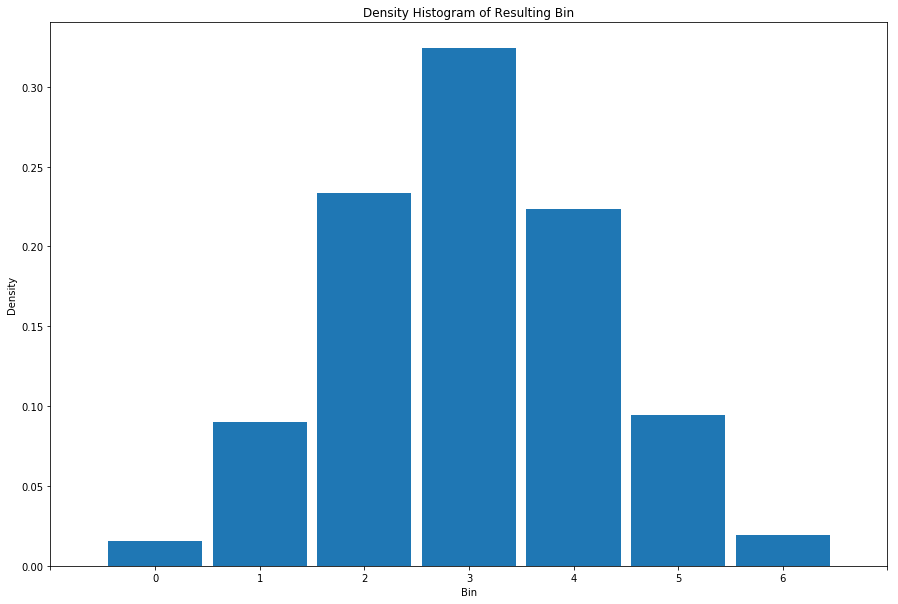

In [8]:
def plinko(n=10000, p_right=0.5):
    # Number of bins
    bins = 7
    
    # Density plot generated by adding a fraction of the total number of sims
    # to the appropriate bin each time.
    inc = 1/n
    # Saves the weights of each bin.
    results = np.zeros(bins)
    
    # Run the simulation
    for ii in range(0, n):
        # Bin the puck lands in.
        b = 0
        
        # Simulate the movement
        for r in range(0,bins-1):
            b += np.random.random() < p_right
        results[b] += inc
        
    return results

        
# Run the game
r = plinko()

# Plotting
my_bins = np.linspace(1,7,7)
plt.figure(figsize=(15,10))
plt.bar(my_bins, r, width=0.9, align='center')
plt.xticks(range(0,9), ("","0","1","2","3","4","5","6",""))
plt.xlim((0,8))
plt.xlabel("Bin")
plt.ylabel("Density")
plt.title("Density Histogram of Resulting Bin")
plt.show()

<br>

**Part B.** Let $X$ be the random variable corresponding to the Bucket that the disc lands in for the situation in **Part A**.  Write down the **true** PMF for $X$. (**Hint**: It might be helpful to reflect back on the discussion from Lecture 11). 

The true PMF for $X$ follows a binomial distribution. In this case, it is $\text{Bin}(6, 0.5)$ where 6 is $n$, the number of trials in each game of Plinko, and $p$ is 0.5, the probability of success (moving right). A trial is whether the puck moves left or right. The full function is:

$$
P_X (k) = \begin{pmatrix} 6 \\ k \end{pmatrix} 
(0.5)^k \, (0.5)^{6 - k}
$$

<br>

**Part C.** 

**[1]** Now write a simulator for Plinko with boundaries, and an argument for the number of rows. Your code should be similar to your code from **Part A**, with the following arguments:
* `n` -- number of Plinko trials
* `p_right` -- the probability of bouncing right at any given peg
* `left_bound` -- the left boundary
* `right_bound` -- the right boundary
* `initial` -- the initial bin that you drop the disc above
* `n_rows` -- number the rows on the plinko board. The board must have number of pegs in the bottom row equal to `n_rows`.

**[2]** As a sanity check, use a 1-row board with `p_right=0.75`, and no left/right boundaries.  Run 10,000 trials and plot a density histogram of the results. The bins should be centered above the corresponding bin numbers, and the axes should be labeled. Does your result match you expect should happen?

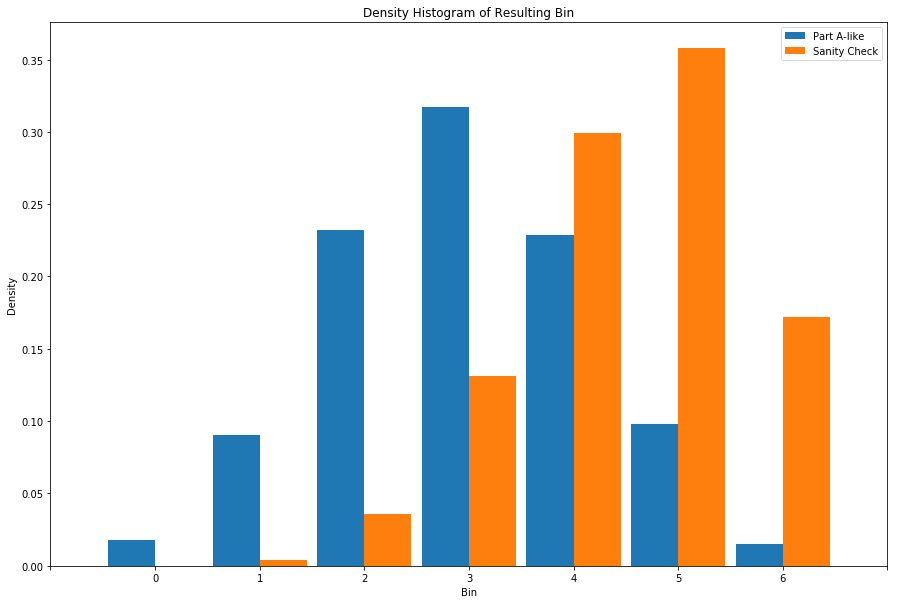

In [9]:
def plinko_bound(n=10000, p_right=0.5, left_bound=0.5, right_bound=5.5, initial=3, n_rows=6):
    assert n_rows % 2 == 0, "Rows must be even."
    
    # Density plot generated by adding a fraction of the total number of sims
    # to the appropriate bin each time.
    inc = 1/n
    # Saves the weights of each bin.
    results = np.zeros(n_rows+1)
    
    # Run the simulation
    for ii in range(0, n):
        x = initial
        for row in range(1,n_rows+1):
            # Boundary conditions and movement
            if x >= right_bound:
                x -= 0.5
            elif x <= left_bound:
                x += 0.5
            else:
                x += (np.random.random() < p_right)-0.5
        results[int(x)] += inc
        
    return results

        
# Run the game with Part A like parameters
r = plinko_bound(n=10000, p_right=0.5, left_bound=-0.5, right_bound=6.5, initial=3, n_rows=6)
# Run the sanity check
r2 = plinko_bound(n=10000, p_right=0.75, left_bound=-0.5, right_bound=6.5, initial=3, n_rows=6)

# Plotting
my_bins = np.linspace(1,7,7)
plt.figure(figsize=(15,10))

w = 0.45
plt.bar(my_bins-w/2, r, width=w, align='center')
plt.bar(my_bins+w/2, r2, width=w, align='center')

plt.legend(("Part A-like", "Sanity Check"))
plt.xticks(range(0,9), ("","0","1","2","3","4","5","6",""))
plt.xlim((0,8))
plt.xlabel("Bin")
plt.ylabel("Density")
plt.title("Density Histogram of Resulting Bin")
plt.show()

These results make sense for what I would expect. Without boundaries and a higher probability to go right, the density histogram skews toward the higher bin numbers.

<br>

**Part D.**  Run 10,000 trials with left and right boundaries at 0.5 and 5.5, respectively, and a 6-row board. Drop the disc above Bin 3. Plot a density histogram of the results, simiarly to **Part C**.

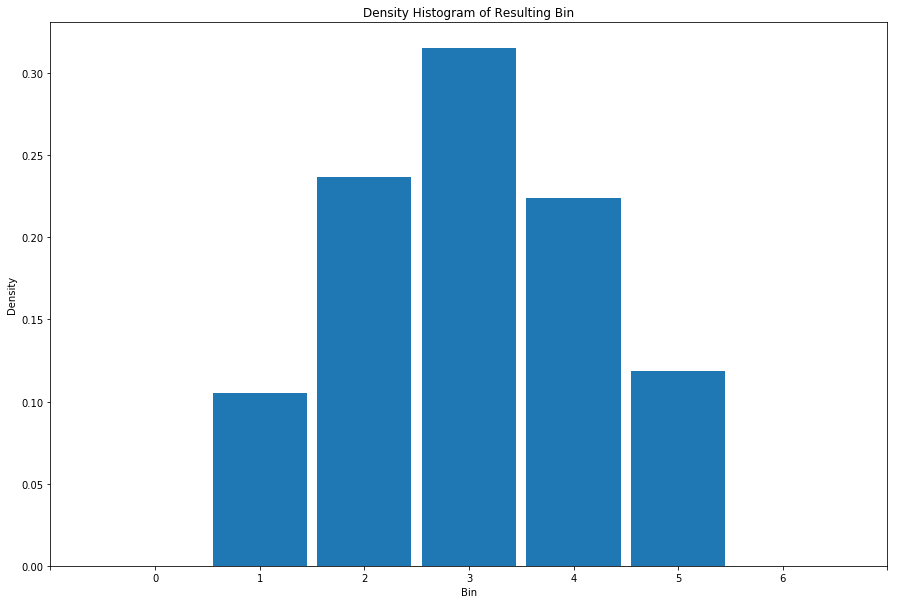

In [10]:
# Run the game with Part A like parameters
r = plinko_bound(n=10000, p_right=0.5, left_bound=0.5, right_bound=5.5, initial=3, n_rows=6)

# Plotting
my_bins = np.linspace(1,7,7)
plt.figure(figsize=(15,10))

w = 0.9
plt.bar(my_bins, r, width=w, align='center')

plt.xticks(range(0,9), ("","0","1","2","3","4","5","6",""))
plt.xlim((0,8))
plt.xlabel("Bin")
plt.ylabel("Density")
plt.title("Density Histogram of Resulting Bin")
plt.show()

With these boundaries, it is evident that the puck can never land in bin 0 or 6. Any puck that would have ended up there instead goes to bin 1 or 5, respectively.

<br>

**Part E.**  Let $X$ be the random variable corresponding to the bucket that the disc lands in for the situation in **Part D**.  Compare the approximate PMF for this board to the no-boundary board from **Part A/B**. Explain the mechanism that causes the differences between the two PMFs in words. Then, write down the **true** PMF for $X$.

The two approximate PMFs in Part A and Part D are very similar, the key difference being the probability mass of bins 0 and 6 in Part A is directly added to the mass of bins 1 and 5, respectively, in Part D. This happens because the boundary blocks a move in one direction on the last row before the puck falls in a bin, isolating bins 0 and 6. Consequently, the true PMF for $X$ in Part D is

$$
P_X (k) = \begin{cases}
          0 & k = 0, \, k = 6 \\
          \begin{pmatrix} n \\ k \end{pmatrix} p^k \, (1-p)^{n-k} + p^n & k = 1, \, k = n-1 \\
          \begin{pmatrix} n \\ k \end{pmatrix} p^k \, (1-p)^{n-k} & \text{otherwise}
          \end{cases}
$$

Plugging in the known values for $p$ and $n$ then reducing,

$$
P_X (k) = \begin{cases}
          0 & k = 0, \, k = 6 \\
          \left[ \begin{pmatrix} 6 \\ k \end{pmatrix} + 1 \right] (0.5)^6 & k = 1, \, k = 5 \\
          \begin{pmatrix} 6 \\ k \end{pmatrix} (0.5)^6 & \text{otherwise}
          \end{cases}
$$

<br>

**Part F.** Suppose I challenge you to a _friendly_ game of Plinko on the board from **Parts D** and **E**.
* If the disc lands in bins 1 or 5, I will pay you \$1
* If the disc lands in bin 3, I will pay you \$3
* If the disc lands in bins 2 or 4, I will pay you nothing
* I will also charge you a flat fee for each disc that you play.

How much should I charge you per disc so that we break even in the long run? 

You will want to charge me the expected value of a random variable $D$ representing the cash return from playing that uses the discrete PMF in Part E. This expected value is computed below.

Computing the probability for each bin:
$$
\begin{align*}
    \left [ \begin{pmatrix} 6 \\ 1 \end{pmatrix} + 1 \right] (0.5)^6 &= 0.109375 \tag{k=1} \\
    \begin{pmatrix} 6 \\ 2 \end{pmatrix} (0.5)^6 &= 0.234375 \tag{k=2} \\
    \begin{pmatrix} 6 \\ 3 \end{pmatrix} (0.5)^6 &= 0.3125 \tag{k=3} \\
    \begin{pmatrix} 6 \\ 4 \end{pmatrix} (0.5)^6 &= 0.234375 \tag{k=4} \\
    \left [ \begin{pmatrix} 6 \\ 5 \end{pmatrix} + 1 \right] (0.5)^6 &= 0.109375 \tag{k=5}
\end{align*}
$$

Using the probabilities to find the expected value:
$$
\begin{align*}
    E[X] &= \sum_{i=1}^{5} a_i P( a_i ) \\
         &= 2(1 \times 0.109375) + 2(0 \times 0.234375) + 3 \times 0.3125 \\
         &\approx \$ 1.16
\end{align*}
$$

So, if you charge me \$1.16 per disc, then the expected amount of cash I'd earn for each disc would be equivalent to the amount that I'd spend.

<br>

---
### Challenge Fun Problem [0 points, but lots of street cred] - Real-Deal Plinko 

Implement a full-blown Plinko simulator based on the actual board from Price is Right, which allows you to choose where to place the disc at the top of the board.  

![alt text](https://i.pinimg.com/736x/7d/4b/5b/7d4b5b9ba5cdeceea16433eaadeeaf13--mash-game-plinko-game.jpg)

You can actually do this using mostly your code from **Problem 3** and some careful handling of the boundaries relative to where you drop the disc.  Investigate questions like "What is the optimal position to drop the disc to maximize expected winnings?" and "What are the expected winnings if you play Plinko optimally?"

Once you're done with that, it's time to go full-on Meta-Plinko.  Suppose the boundaries of the Plinko board are in their true positions from the real game show, but the board can have an arbitrary number of rows.  Is there a minimum number of rows the board can have at which point the PMF for the distribution becomes approximately uniform?  If not, is there a Bucket, or set of Buckets, that always have a greater chance of claiming the disc? 


<br>

---
### Notes

<a/ id='rad'></a> 200 mSv is somewhere below Chernobyl levels of exposure, but more radiation than you would want with regard to potentially increasing your risk of cancer. It's probably too high, but it is a nice round number! More information [here](https://www.theguardian.com/news/datablog/2011/mar/15/radiation-exposure-levels-guide).

[Back to Problem 2](#p2)